In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [2]:
telecom=pd.read_csv("Telecom_customer_churn.csv")

In [3]:
telecom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
telecom.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
telecom.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
175,1744-JHKYS,Female,0,Yes,No,34,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,24.7,780.2,No
1897,7776-QWNFX,Male,1,Yes,No,30,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.4,1527.5,Yes
3676,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.4,2044.75,No
1763,6519-CFDBX,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.4,80.95,No
7002,9586-JGQKH,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.4,6794.75,No


In [6]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telecom.shape

(7043, 21)

In [8]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
telecom=pd.DataFrame(data=telecom)

In [12]:
telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
telecom.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
telecom.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
telecom.drop('customerID', axis=1,inplace=True)

In [17]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors="coerce")

In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
telecom.drop(telecom[telecom['TotalCharges'].isnull()].index,inplace=True)

In [21]:
telecom.reset_index(inplace=True)

In [22]:
telecom.shape

(7032, 21)

In [23]:
telecom.corr()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
index,1.000000,0.008057,0.006801,-0.012938,0.001820
SeniorCitizen,0.008057,1.000000,0.015683,0.219874,0.102411
tenure,0.006801,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,-0.012938,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.001820,0.102411,0.825880,0.651065,1.000000


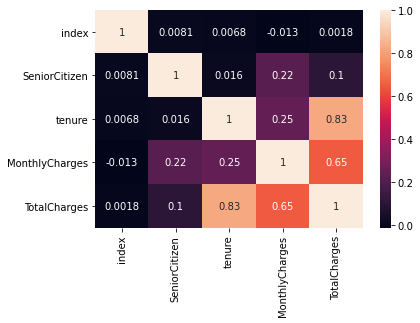

In [24]:
sns.heatmap(telecom.corr(),annot=True)
plt.show()

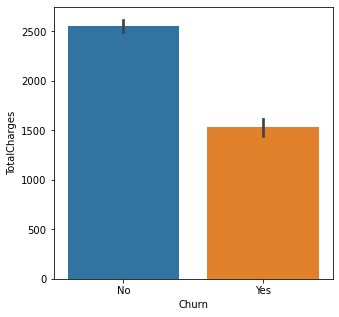

In [25]:
plt.figure(figsize=(5,5))

sns.barplot(data=telecom, y="TotalCharges", x="Churn")

plt.show()

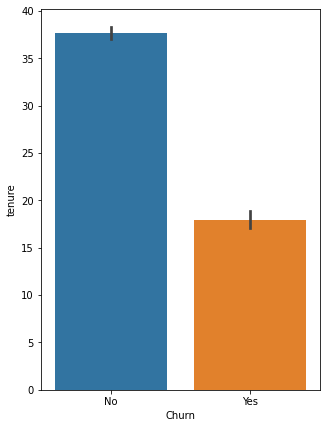

In [26]:
plt.figure(figsize=(5,7))

sns.barplot(data=telecom, x="Churn", y="tenure")

plt.show()

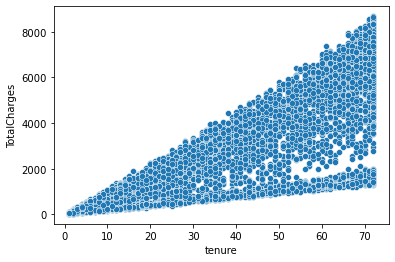

In [27]:
sns.scatterplot(data=telecom, x="tenure", y="TotalCharges")
plt.show()

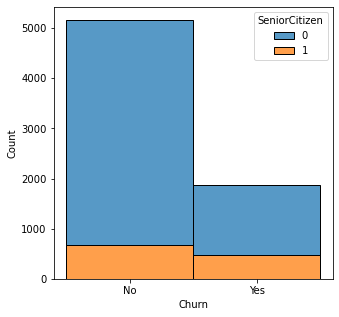

In [28]:
plt.figure(figsize=(5,5))
sns.histplot(data=telecom,  x="Churn", hue='SeniorCitizen',multiple="stack" )
plt.show()

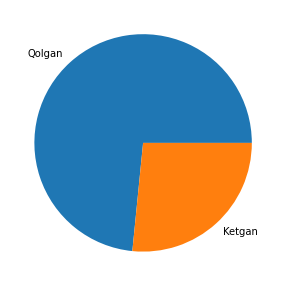

In [29]:
churn_rate = telecom['Churn'].value_counts()/len(telecom)*100
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

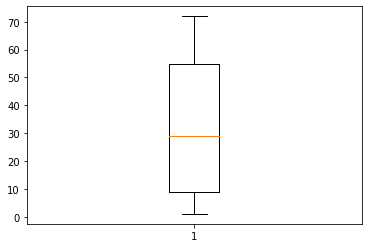

array([[<AxesSubplot:title={'center':'tenure'}>]], dtype=object)

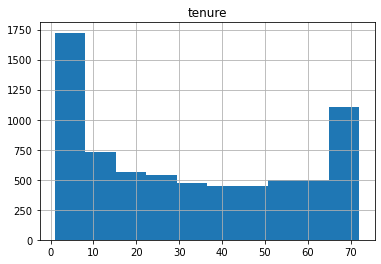

In [30]:
plt.boxplot(telecom['tenure'])
plt.show()
telecom.hist(column='tenure')

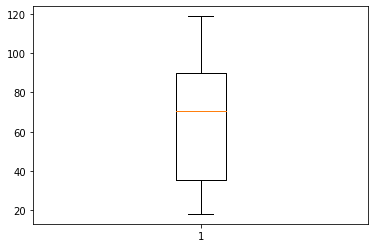

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>]], dtype=object)

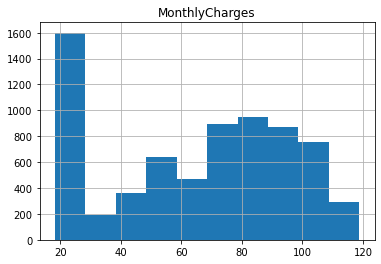

In [31]:
plt.boxplot(telecom['MonthlyCharges'])
plt.show()
telecom.hist(column='MonthlyCharges')

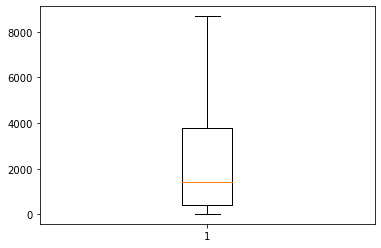

array([[<AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

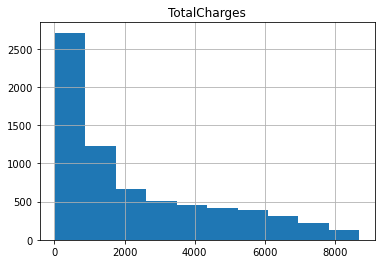

In [32]:
plt.boxplot(telecom['TotalCharges'])
plt.show()
telecom.hist(column='TotalCharges')

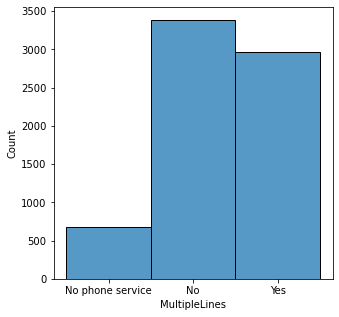

In [33]:
plt.figure(figsize=(5,5))
sns.histplot(data=telecom,  x="MultipleLines" )
plt.show()

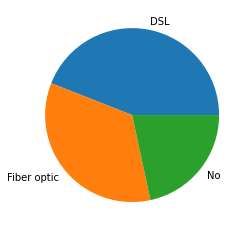

In [34]:
labels = telecom['InternetService'].unique()
values = telecom['InternetService'].value_counts()

plt.pie(x=values,labels=labels)
plt.show()

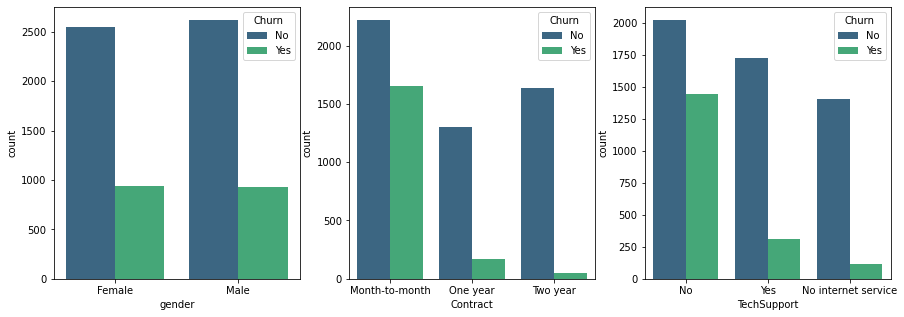

In [35]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='gender', hue='Churn', palette='viridis', data=telecom, ax=axes[0])


sns.countplot(x='Contract', hue='Churn', palette='viridis', data=telecom, ax=axes[1])


sns.countplot(x='TechSupport', hue='Churn', palette='viridis', data=telecom, ax=axes[2])

plt.show()

<AxesSubplot:xlabel='InternetService', ylabel='count'>

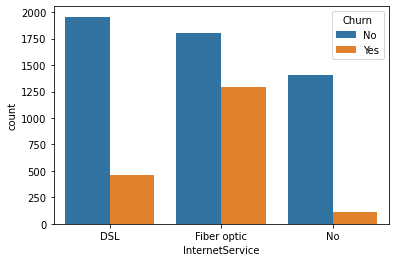

In [36]:
sns.countplot(x='InternetService', data=telecom, hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

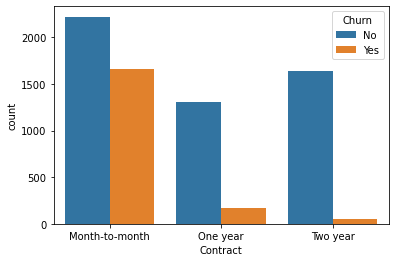

In [37]:
sns.countplot(x='Contract', data=telecom, hue='Churn')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

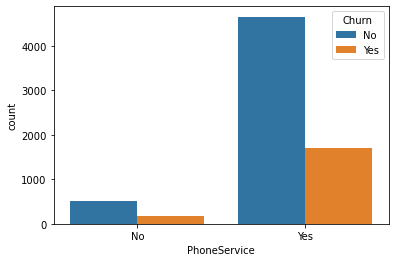

In [38]:
sns.countplot(x='PhoneService', data=telecom, hue='Churn')

In [39]:
def stacked_plot(telecom, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    
    fig, ax = plt.subplots(figsize = (6,4))
    temp_telecom = (telecom.groupby([group, target]).size()/telecom.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_telecom.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

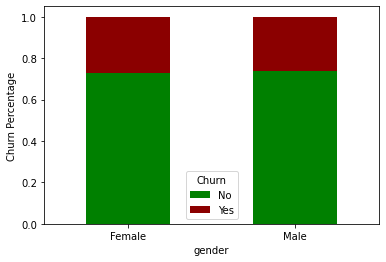

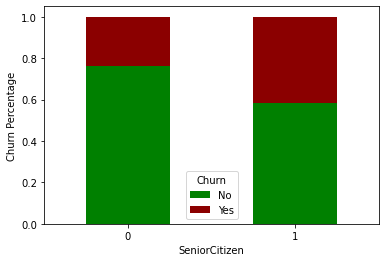

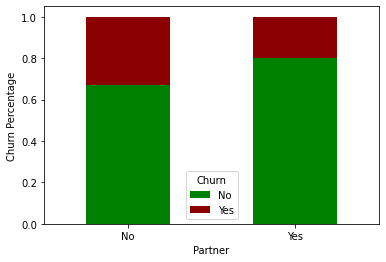

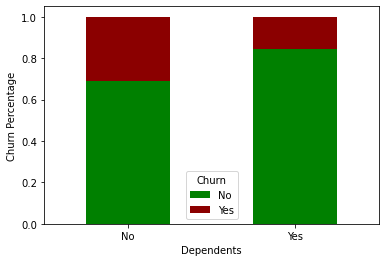

In [40]:
stacked_plot(telecom, "gender", "Churn")
stacked_plot(telecom, "SeniorCitizen", "Churn")
stacked_plot(telecom, "Partner", "Churn")
stacked_plot(telecom, "Dependents", "Churn")

In [41]:
telecom[(telecom.SeniorCitizen == 0) & (telecom.Partner == 'Yes') & (telecom.Dependents == 'Yes')].Churn.value_counts()

No     1428
Yes     229
Name: Churn, dtype: int64

In [42]:
telecom[(telecom.SeniorCitizen == 0) & (telecom.Partner == 'Yes') & (telecom.Dependents == 'No')].Churn.value_counts()

No     921
Yes    242
Name: Churn, dtype: int64

In [43]:
telecom[(telecom.SeniorCitizen == 0) & (telecom.Partner == 'No') & (telecom.Dependents == 'Yes')].Churn.value_counts()

No     276
Yes     75
Name: Churn, dtype: int64

In [44]:
telecom[(telecom.SeniorCitizen == 0) & (telecom.Partner == 'No') & (telecom.Dependents == 'No')].Churn.value_counts()

No     1872
Yes     847
Name: Churn, dtype: int64

In [45]:
telecom['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [46]:
telecom['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

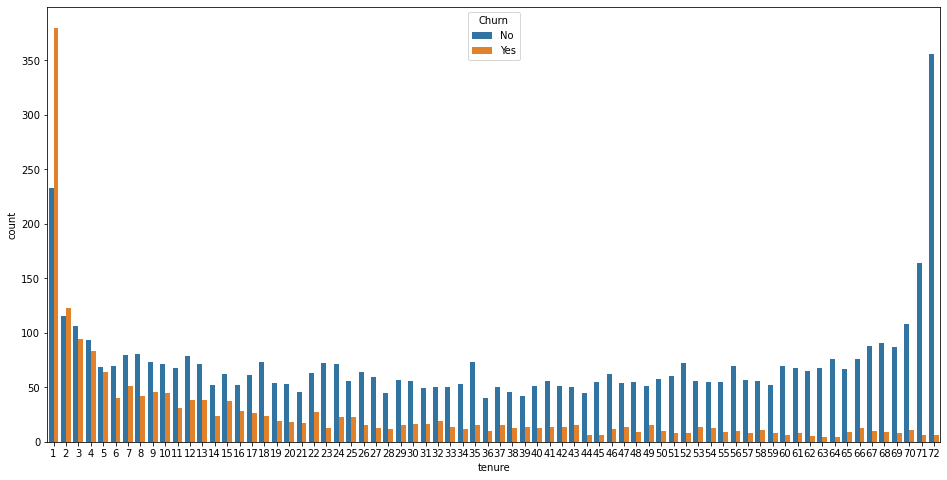

In [47]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=telecom)
plt.show()

In [48]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

telecom["tenure_group"]=telecom["tenure"].apply(lambda x: tenure(x))

In [49]:
telecom["tenure_group"].value_counts()

1    2175
6    1407
2    1024
5     832
3     832
4     762
Name: tenure_group, dtype: int64

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

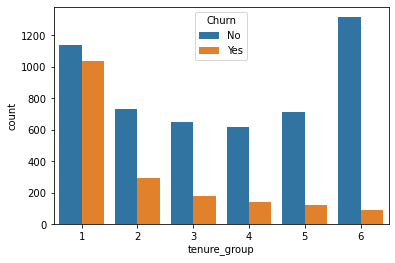

In [50]:
sns.countplot(x="tenure_group", hue="Churn", data=telecom)

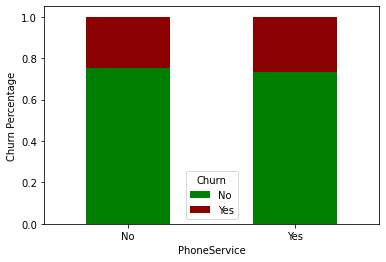

In [51]:
stacked_plot(telecom, "PhoneService", "Churn")

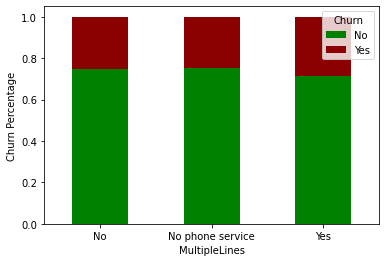

In [52]:
stacked_plot(telecom, "MultipleLines", "Churn")

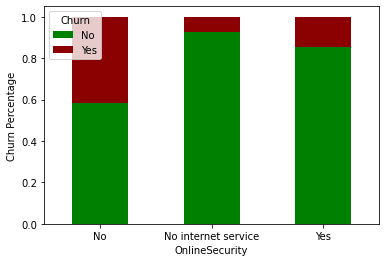

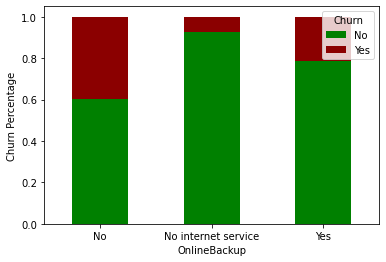

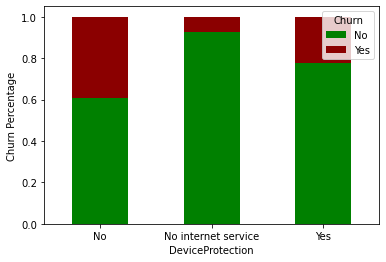

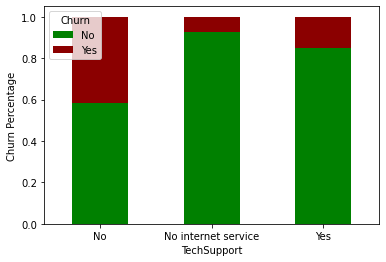

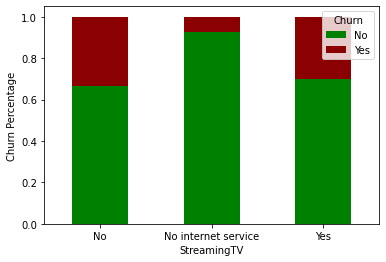

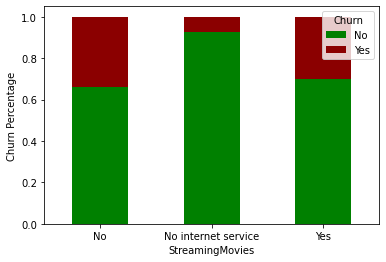

In [53]:
stacked_plot(telecom, "OnlineSecurity", "Churn")
stacked_plot(telecom, "OnlineBackup", "Churn")
stacked_plot(telecom, "DeviceProtection", "Churn")
stacked_plot(telecom, "TechSupport", "Churn")
stacked_plot(telecom, "StreamingTV", "Churn")
stacked_plot(telecom, "StreamingMovies", "Churn")

In [54]:
for i in telecom.columns:
    if telecom[i].dtypes=="object":
        print(f'{i} : {telecom[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [55]:
telecom.replace('No internet service', 'No', inplace=True)
telecom.replace('No phone service', 'No', inplace=True)

In [56]:
telecom['gender'].replace({'Female':1,'Male':0},inplace=True)
telecom.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,1,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,1,0,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,2,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,3,0,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,4,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [57]:
for i in telecom.columns:
    if telecom[i].dtypes=="object":
        print(f'{i} : {telecom[i].unique()}')

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [58]:
for i in telecom.columns:
    if (len(telecom[i].unique()) >2) & (telecom[i].dtypes != "int64") &(telecom[i].dtypes!= "float64"):
        print(i)

InternetService
Contract
PaymentMethod


In [59]:
more_than_two = ['InternetService','Contract','PaymentMethod']
telecom= pd.get_dummies(data= telecom, columns=more_than_two)
telecom.dtypes

index                                        int64
gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
tenure_group                                 int64
InternetService_DSL            

In [60]:
telecom.shape

(7032, 29)

In [61]:
for i in telecom.columns:
    if (telecom[i].dtypes == "object"):
        print(i)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [62]:
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    telecom[i].replace({"No":0, "Yes":1}, inplace=True)
telecom.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,3,0,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,4,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [63]:
telecom.drop('index', axis=1, inplace=True)

In [64]:
scaler = MinMaxScaler()
large_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
telecom[large_cols] = scaler.fit_transform(telecom[large_cols])
telecom[large_cols].head()    

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [65]:
telecom

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [66]:
telecom.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
tenure_group                                 int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [67]:
x = telecom.drop('Churn', axis=1)
y = telecom['Churn']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [69]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [70]:
y_pred_log = LR_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred_log))
lg=metrics.accuracy_score(y_test,y_pred_log)*100
print("Model aniqligi:", lg )

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.54      0.59       610

    accuracy                           0.80      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321

Model aniqligi: 80.26712623869022


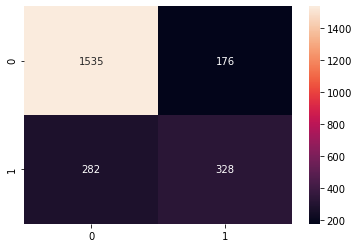

In [71]:
conf_mat_log = metrics.confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_mat_log, annot=True, fmt='g')
plt.show()

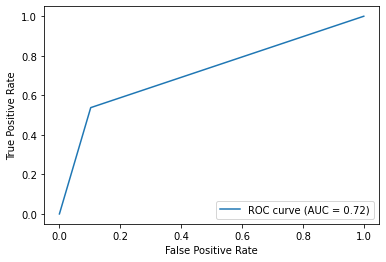

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [73]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [74]:
y_pred_svm = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred_svm))
svm = metrics.accuracy_score(y_test,y_pred_svm)*100
print("Model aniqligi:", svm)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1711
           1       0.65      0.46      0.54       610

    accuracy                           0.79      2321
   macro avg       0.74      0.69      0.71      2321
weighted avg       0.78      0.79      0.78      2321

Model aniqligi: 79.44851357173633


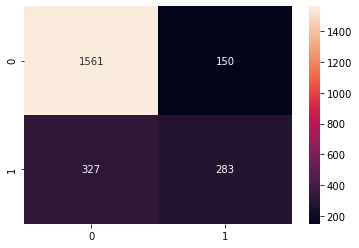

In [75]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

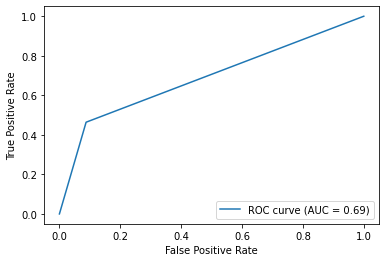

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_svm)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [77]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred_tree = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred_tree))
tree=metrics.accuracy_score(y_test,y_pred_tree)*100
print("Model aniqligi:", tree)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1711
           1       0.47      0.51      0.49       610

    accuracy                           0.72      2321
   macro avg       0.65      0.65      0.65      2321
weighted avg       0.73      0.72      0.72      2321

Model aniqligi: 72.16716932356742


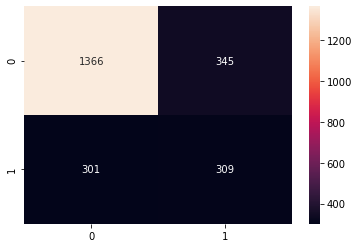

In [79]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

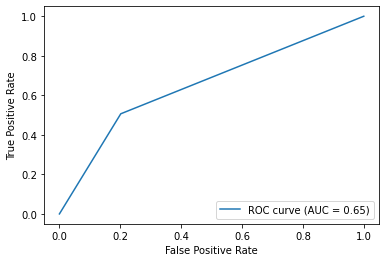

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_tree)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [81]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=9)

In [82]:
y_pred_rf = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred_rf))
rf=metrics.accuracy_score(y_test,y_pred_rf)*100
print("Model aniqligi:", rf)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1711
           1       0.56      0.51      0.53       610

    accuracy                           0.77      2321
   macro avg       0.70      0.68      0.69      2321
weighted avg       0.76      0.77      0.76      2321

Model aniqligi: 76.77725118483413


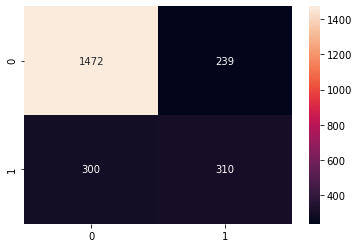

In [83]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

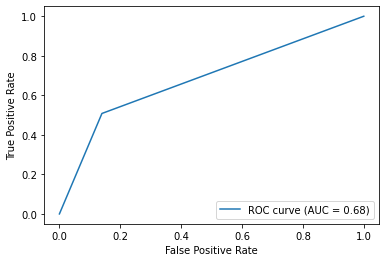

In [84]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [85]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
y_pred_xgb = xgb_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred_xgb))
xgb=metrics.accuracy_score(y_test,y_pred_xgb)*100
print("Model aniqligi:", xgb)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1711
           1       0.59      0.51      0.55       610

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.77      0.78      0.77      2321

Model aniqligi: 77.68203360620423


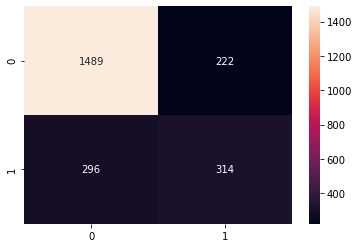

In [87]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

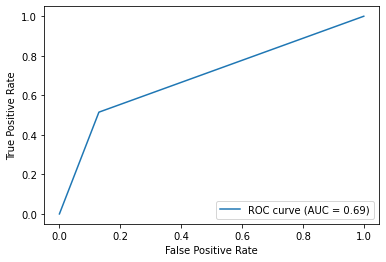

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

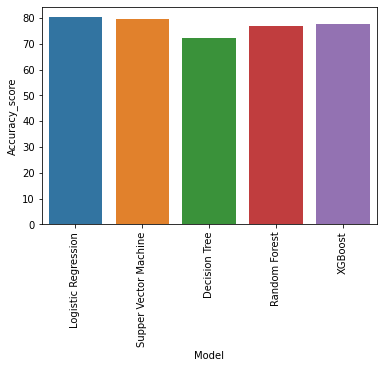

,Model,Accuracy_score
0,Logistic Regression,80.267126
1,Supper Vector Machine,79.448514
4,XGBoost,77.682034
3,Random Forest,76.777251
2,Decision Tree,72.167169


In [89]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Supper Vector Machine', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy_score' :[lg, svm,tree, rf, xgb]
})
models
sns.barplot(x='Model', y='Accuracy_score', data=models)
plt.xticks(rotation=90)
plt.show()
models.sort_values(by='Accuracy_score', ascending=False)